### Create The Dataset

In [2]:
# Import Libraries
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


X, y = make_classification(
    n_samples = 10000, #number of samples 
    n_features = 20, #total number of features
    n_informative = 10, #number of informative features
    n_redundant = 5, #number of redundant features
    n_classes = 2, #binary_classification (fraud or not fraud)
    weights = [0.9, 0.1], #imbalance in classes
    random_state=42
)
# Split the dataset into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert the data to dataframe
train_data = pd.DataFrame(X_train)
train_data["is fraud"] = y_train
print(train_data.head())

          0         1         2         3         4         5         6  \
0  2.278234 -1.077782  0.683749  1.258036  1.096891 -0.373797 -2.285019   
1  0.207762  2.541868  2.669859  3.035471 -1.073374  0.991900  6.247372   
2  1.356635 -0.334045 -1.913800 -1.376498 -1.673701 -1.081030 -0.137141   
3  0.626707 -0.474721  0.581450  0.919342 -2.998093  0.834397  5.976509   
4  0.339939 -0.018194 -2.381988  0.389720  2.783303  0.493958 -1.095447   

          7         8         9  ...        11        12        13        14  \
0 -0.295547 -0.383005 -0.589401  ... -0.201196 -0.160192 -2.195265  0.092113   
1  1.157270 -0.774492  2.154005  ...  0.214034  0.244108 -4.769822 -1.326939   
2 -3.958890 -1.487756  1.188392  ... -0.657528 -0.747277 -0.531501 -0.657229   
3  2.033002  1.063391  2.630003  ...  0.063876  1.520281 -1.955266 -0.423872   
4 -2.181555 -0.884478  1.871163  ... -0.531785  0.363369 -5.204850 -0.626679   

         15        16        17        18        19  is fraud  
0  1

### Random Forest Classifier

In [4]:
# Import Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate model
print(f"Random Forest Classification Report: \n {classification_report(y_test, rf_predictions)}")

print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_predictions)}")

Random Forest Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      2681
           1       0.94      0.60      0.73       319

    accuracy                           0.95      3000
   macro avg       0.95      0.80      0.85      3000
weighted avg       0.95      0.95      0.95      3000

Random Forest Accuracy: 0.9536666666666667


### Gradient Boosting Classifier

In [6]:
# Import Librabry
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train model
gb_model.fit(X_train,y_train)

# Make predictions on the test set
gb_predictions = gb_model.predict(X_test)

# Evaluate model
print(f"Gradient Boosting Classification Report: \n {classification_report(y_test, gb_predictions)}")

print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, gb_predictions)}")

Gradient Boosting Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      2681
           1       0.89      0.55      0.68       319

    accuracy                           0.95      3000
   macro avg       0.92      0.77      0.83      3000
weighted avg       0.94      0.95      0.94      3000

Gradient Boosting Accuracy: 0.9453333333333334


### Neural Network Classifier

In [8]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

# Standardize the features for the Neural Network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Build the Neural Network Model
nn_model = Sequential([ # defines a model as linear stack of layers
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid") # used for binary classification, output probabilities between o and 1
])
# Compile the model
nn_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = nn_model.fit(X_train_scaled, y_train, epochs =10, batch_size=32, validation_split=0.2)

# Make predictions on the test set
nn_predictions = (nn_model.predict(X_test_scaled) > 0.5).astype("int32") # Predict probabilities, threshold at 0.5

# Evaluate the model
print(f"Neural Network Classification Report: \n {classification_report(y_test, nn_predictions)}")

print(f"Neural Network Accuracy: {accuracy_score(y_test, nn_predictions)}")

Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.8142 - loss: 0.4075 - val_accuracy: 0.9343 - val_loss: 0.1954
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - accuracy: 0.9415 - loss: 0.1703 - val_accuracy: 0.9414 - val_loss: 0.1683
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - accuracy: 0.9471 - loss: 0.1615 - val_accuracy: 0.9493 - val_loss: 0.1459
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step - accuracy: 0.9517 - loss: 0.1435 - val_accuracy: 0.9571 - val_loss: 0.1325
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - accuracy: 0.9599 - loss: 0.1202 - val_accuracy: 0.9600 - val_loss: 0.1283
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step - accuracy: 0.9610 - loss: 0.1236 - val_accuracy: 0.9593 - val_loss: 0.1258
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - accuracy: 0.9652 - loss: 0.1095 - val_accuracy: 0.9579 - val_loss: 0.1215
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - accuracy: 0.9701 - loss: 0.0950 - val_accurac

## Comparison using Confusion Matrix

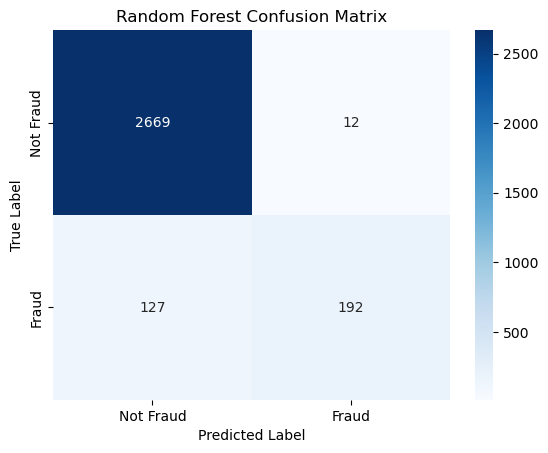

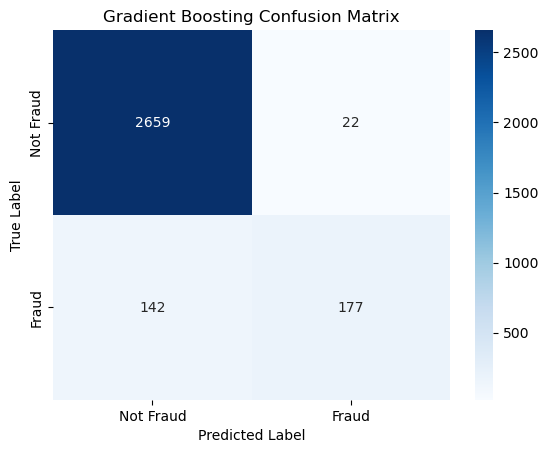

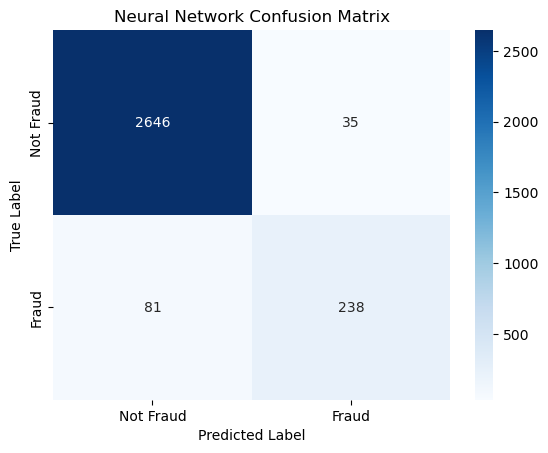

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, title):
    matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

plot_confusion_matrix(y_test, rf_predictions, "Random Forest Confusion Matrix")
plot_confusion_matrix(y_test, gb_predictions, "Gradient Boosting Confusion Matrix")
plot_confusion_matrix(y_test, nn_predictions, "Neural Network Confusion Matrix")